In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [3]:
X_train_scaled = scaler.transform(X_train)
print("transformated shape: {}".format(X_train_scaled.shape))
print("per-feature minimum after scaling: {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling: {}".format(X_train_scaled.max(axis=0)))

transformated shape: (426, 30)
per-feature minimum after scaling: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [6]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

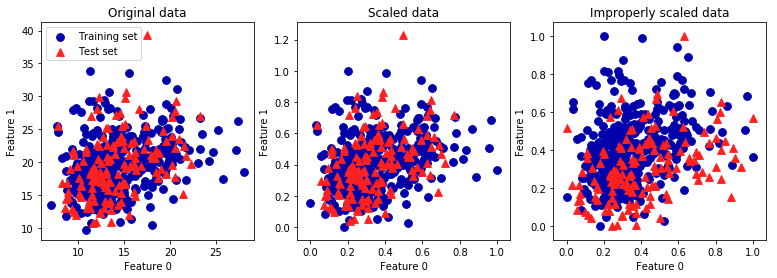

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn

fig, axes = plt.subplots(1, 3, figsize=(13,4))
axes[0].scatter(X_train[:,0], X_train[:,1], c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:,0], X_test[:,1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original data")

#scale the data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#visualize the data
axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled data")

#scale the test data separately
#WARNING!!!
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_bad = test_scaler.transform(X_test)

#visualize the bad data
axes[2].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2(0), label="Training set", s=60)
axes[2].scatter(X_test_scaled_bad[:,0], X_test_scaled_bad[:,1], c=mglearn.cm2(1), marker='^', label="Test set", s=60)
axes[2].set_title("Improperly scaled data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

In [12]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

#scale the data with MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(C=100)
svm.fit(X_train_scaled, y_train)

print("Accuracy of test set: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Accuracy of test set: 0.97


C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print("Accuracy of test set: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Accuracy of test set: 0.96


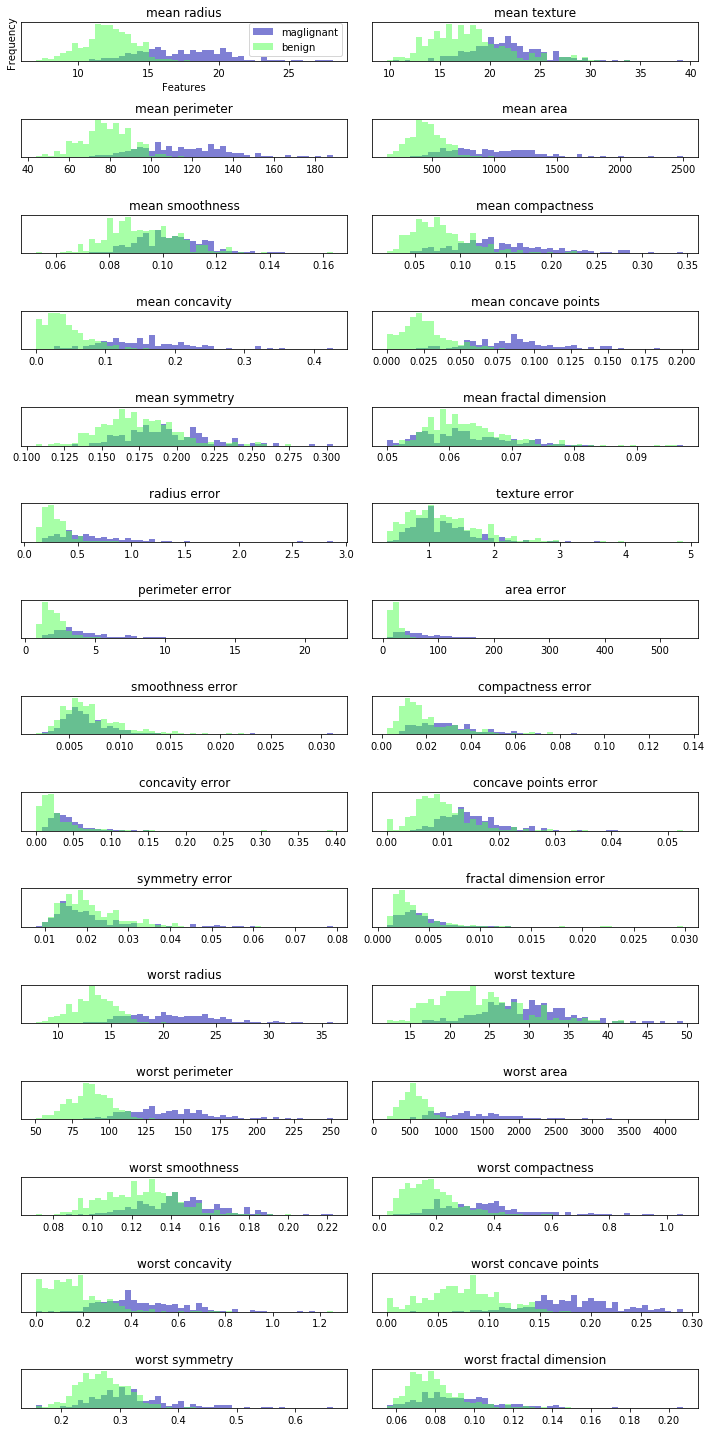

In [24]:
import numpy as np

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
maglignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(maglignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Features")
ax[0].set_ylabel("Frequency")
ax[0].legend(["maglignant", "benign"], loc="best")
fig.tight_layout()

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

pca = PCA(n_components=2)
#find the principal components
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(X_scaled.shape))
print("Reduced shape: {}".format(X_pca.shape))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0,0.5,'Second principal component')

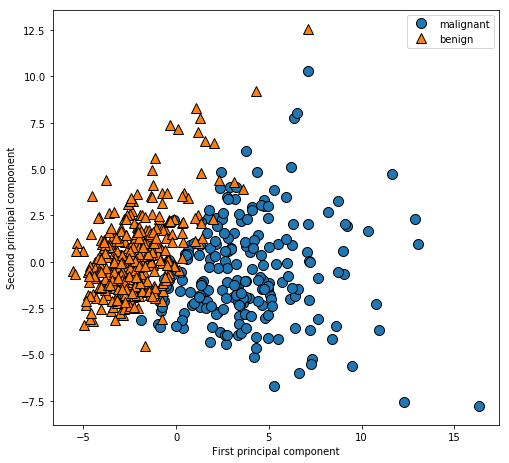

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn

#plot the first two components
plt.subplots(figsize=(8, 8))

mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [5]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


Text(0,0.5,'Principal component')

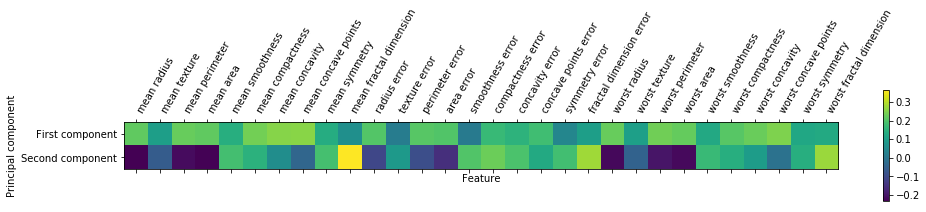

In [9]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal component")

In [2]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

In [3]:
print(image_shape)

(87, 65)


In [3]:
import numpy as np

counts = np.bincount(people.target)
print(counts)

[ 39  35  21  36  20  77  42  24  29  21 236  31 121  22 530 109  44  26
  30  22  39  71  20  28  52  55  21  42  21  24  20  53  31  23  28  60
  32  41  22  41  48  29  33  20  22  37  20  22  30  27  32  26  23  52
  33  23  25  33 144  32  49  24]


(3023, 87, 65)
62


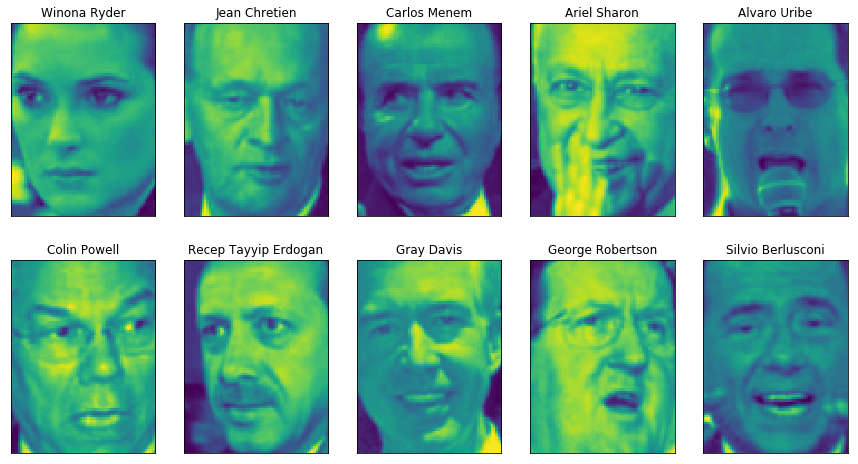

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':(), 'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
print(people.images.shape)
print(len(people.target_names))

In [11]:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{:25} {:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [5]:
import numpy as np

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score : {:.2f}".format(knn.score(X_test, y_test)))

Test set score : 0.23


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [58]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set score: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set score: 0.31


In [67]:
print("component shape: {}".format(pca.components_.shape))
print("image shape: {}".format(image_shape))
print("Shape of X_train: {}".format(X_train.shape))

component shape: (100, 5655)
image shape: (87, 65)
Shape of X_train: (1547, 5655)


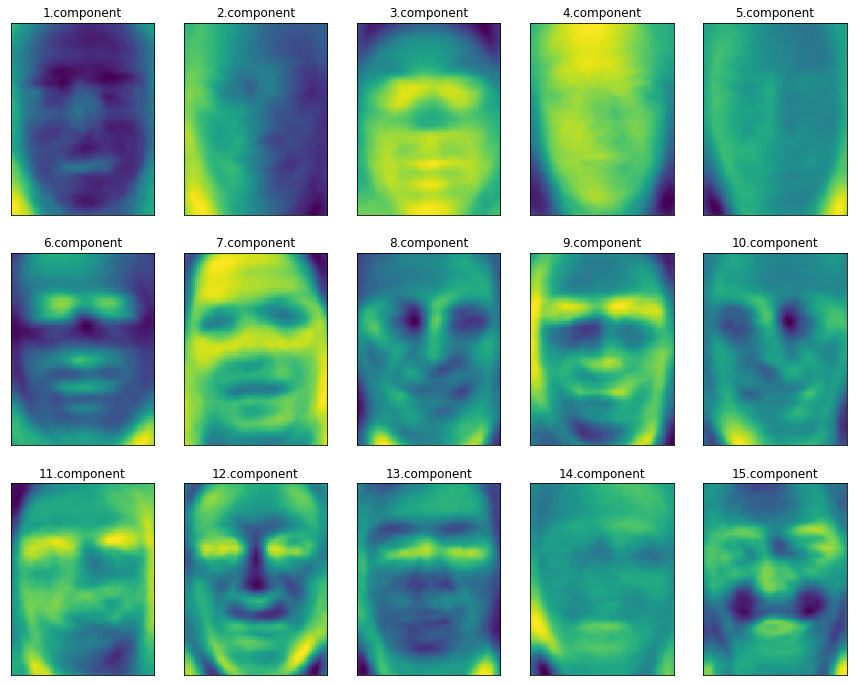

In [67]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}.component".format(i+1))

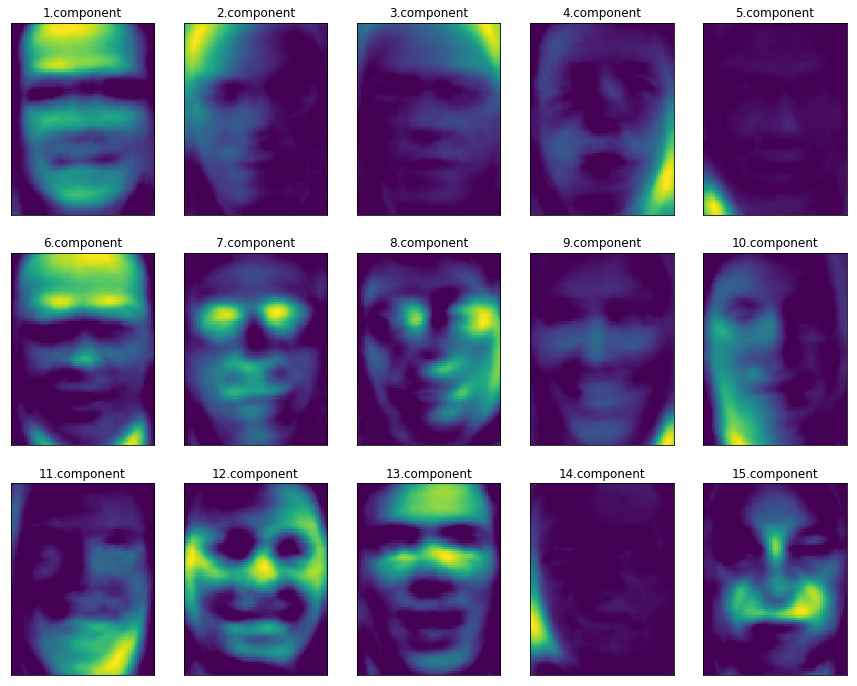

In [72]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}.component".format(i+1))

In [73]:
print(X_train_nmf.shape)

(1547, 15)


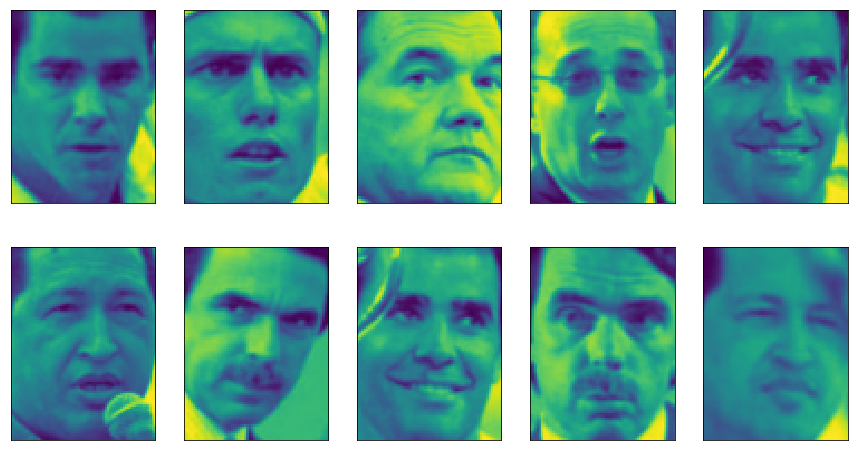

In [104]:
compn = 3
inds = np.argsort(X_train_nmf[:,3])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':(), 'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

In [2]:
import mglearn

S = mglearn.datasets.make_signals()
print("Shape of S: {}".format(S.shape))

Shape of S: (2000, 3)


In [5]:
import numpy as np

#mix data
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print("Shape of measurement: {}".format(X.shape))

Shape of measurement: (2000, 100)


In [6]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Shape of recoverd signal shape: {}".format(S_.shape))

Shape of recoverd signal shape: (2000, 3)


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
H = pca.fit_transform(X)
print("Shape of pca signal shape: {}".format(H.shape))

Shape of pca signal shape: (2000, 3)


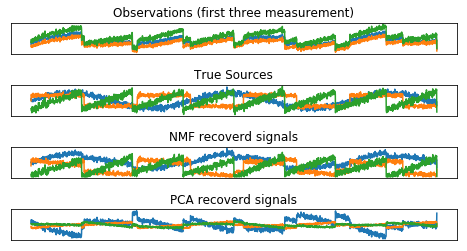

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

models = [X, S, S_, H]
names = ['Observations (first three measurement)', 'True Sources', 'NMF recoverd signals', 'PCA recoverd signals']
fig, axes = plt.subplots(4, figsize=(8,4), gridspec_kw={'hspace':1}, subplot_kw={'xticks':(), 'yticks':()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:,:3], '-')

In [32]:
from sklearn.datasets import load_digits
digits = load_digits()

In [33]:
print("Shape of data: {}".format(digits.data.shape))
print("length of data: {}".format(len(digits.data)))
print("length of target: {}".format(len(digits.target)))

Shape of data: (1797, 64)
length of data: 1797
length of target: 1797


In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)

Text(0,0.5,'Second principal component')

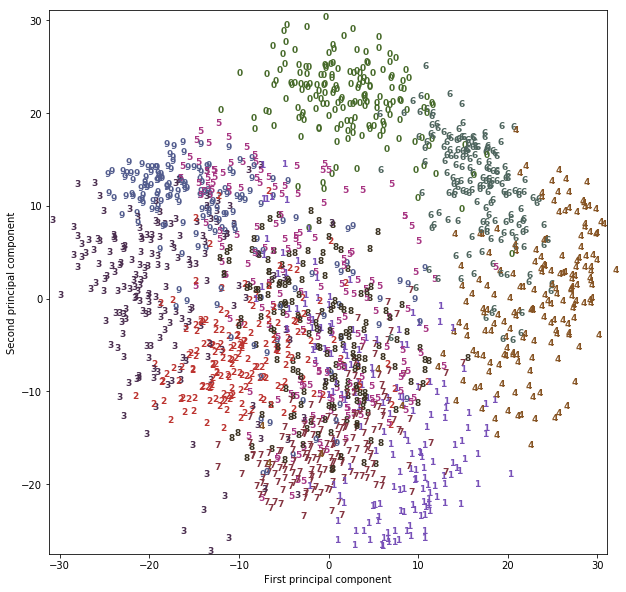

In [40]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.subplots(figsize=(10, 10))
plt.ylim(min(digits_pca[:,1]), max(digits_pca[:,1]) + 1)
plt.xlim(min(digits_pca[:,0]), max(digits_pca[:,1]) + 1)
for i in range(len(digits.data)):
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]), color=colors[digits.target[i]],
             fontdict={'weight':'bold', 'size':9})
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [31]:
from sklearn.manifold import TSNE

# two features - closed by points and far apart points
tsne = TSNE(random_state=42)
#TSNE has no transform method
digit_tsne = tsne.fit_transform(digits.data)

Text(0,0.5,'tsne feature 1')

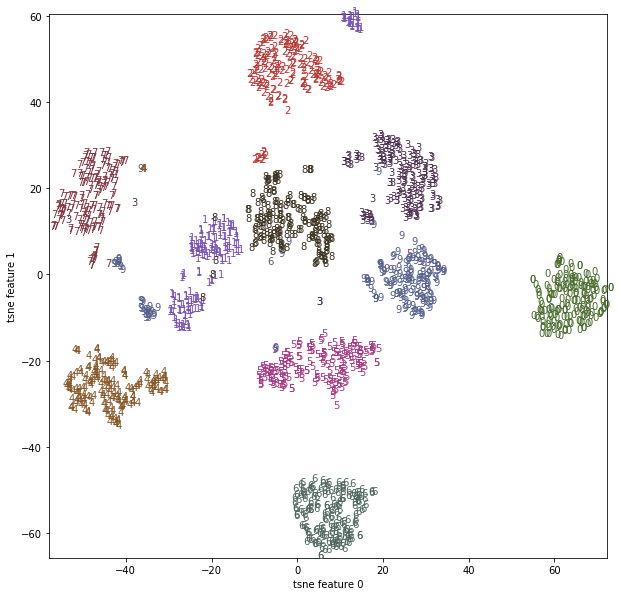

In [40]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.subplots(figsize=(10, 10))
plt.ylim(min(digit_tsne[:,1]), max(digit_tsne[:,1]) + 1)
plt.xlim(min(digit_tsne[:,0]), max(digit_tsne[:,0]) + 1)
for i in range(len(digits.data)):
    plt.text(digit_tsne[i,0], digit_tsne[i,1], str(digits.target[i]), color=colors[digits.target[i]], 
             fontdict={'weight':'bold', 'size': 9})
plt.xlabel("tsne feature 0")
plt.ylabel("tsne feature 1")

In [41]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
print("Cluster memberships: \n{}".format(kmeans.labels_))

Cluster memberships: 
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


[ -1.4710815  -10.04935243  -6.58196786] [ 4.33721882 -3.85954095 -8.17239339]
[[ -1.4710815    4.33721882]
 [-10.04935243  -3.85954095]
 [ -6.58196786  -8.17239339]]


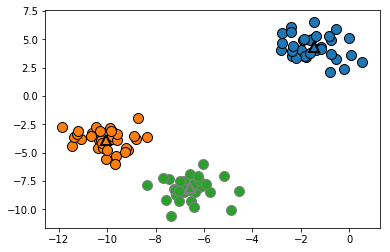

In [50]:
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2], markers='^', markeredgewidth=2)
print(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])
print(kmeans.cluster_centers_)

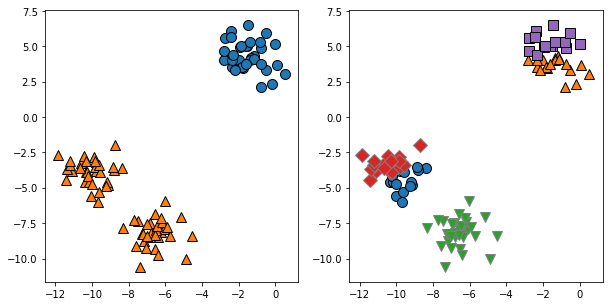

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#cluster = 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[0])

#cluster = 5
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[1])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF, PCA
from sklearn.cluster import KMeans

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
#nmf
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
#pca
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
#kmeans
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [7]:
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

In [10]:
print(X_reconstructed_pca.shape)
print(X_reconstructed_kmeans.shape)
print(X_reconstructed_nmf.shape)

(516, 5655)
(516, 5655)
(516, 5655)


Text(0,0.5,'nmf')

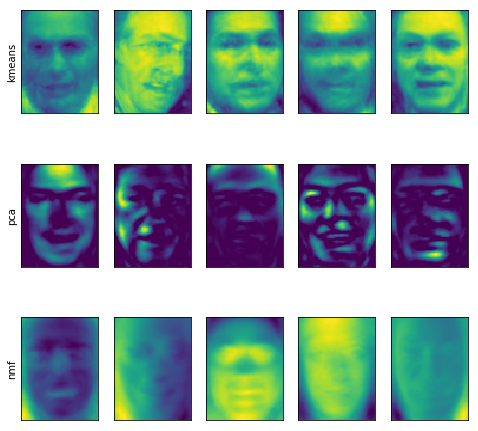

In [70]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks':(),'yticks':()})

for ax, comp_kmeans, comp_nmf, comp_pca in zip(axes.T, kmeans.cluster_centers_, nmf.components_, pca.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_nmf.reshape(image_shape))
    ax[2].imshow(comp_pca.reshape(image_shape))
axes[0,0].set_ylabel("kmeans")
axes[1,0].set_ylabel("pca")
axes[2,0].set_ylabel("nmf")

Text(0,0.5,'nmf')

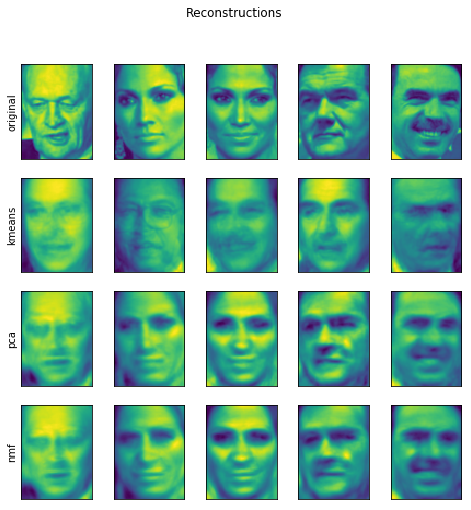

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
                                                 X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0,0].set_ylabel('original')
axes[1,0].set_ylabel('kmeans')
axes[2,0].set_ylabel('pca')
axes[3,0].set_ylabel('nmf')

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


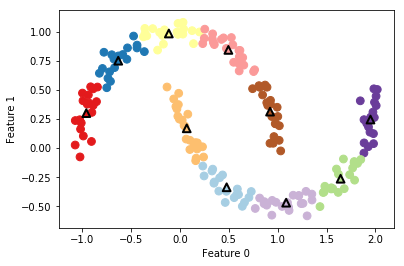

In [24]:
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=60, marker='^', 
            c=range(kmeans.n_clusters), linewidth=2, edgecolors='Black',cmap='Paired')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
print("Cluster memberships:\n{}".format(y_pred))

In [26]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features: {}".format(distance_features))

Distance feature shape: (200, 10)
Distance features: [[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


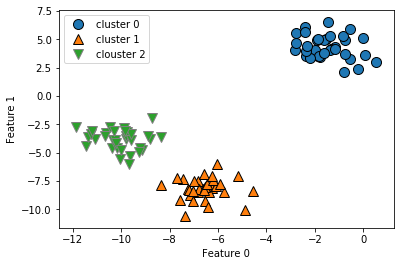

In [31]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import mglearn
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["cluster 0","cluster 1", "clouster 2"], loc="best")

Text(0,0.5,'Cluster distance')

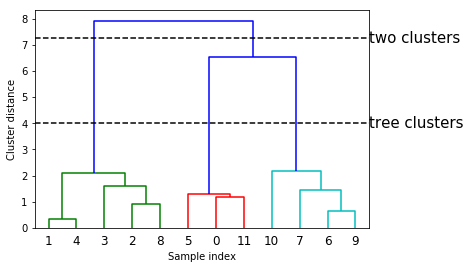

In [33]:
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
linkage_array = ward(X)
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, 'two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, 'tree clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster members:\n{}".format(clusters))

Cluster members:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


Text(0,0.5,'Feature 1')

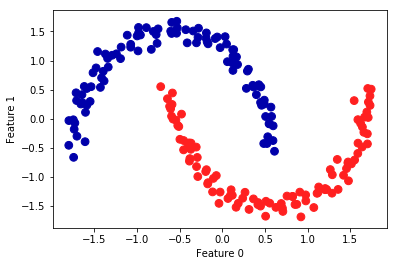

In [8]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [9]:
print(clusters)

[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]


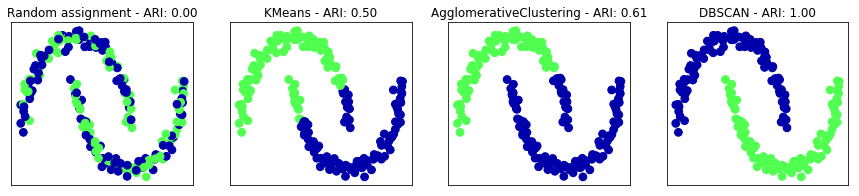

In [3]:
# compare 3 different methods + random assignment
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
import numpy as np
import mglearn

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15,3), subplot_kw={'xticks':(), 'yticks':()})

#list of algorithms
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

#random cluster
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60)
    # evaluate the outcome of clustering using ARI
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

In [13]:
from sklearn.metrics import accuracy_score

clusters1 = [0,0,1,1,0]
clusters2 = [1,1,0,0,1]

print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


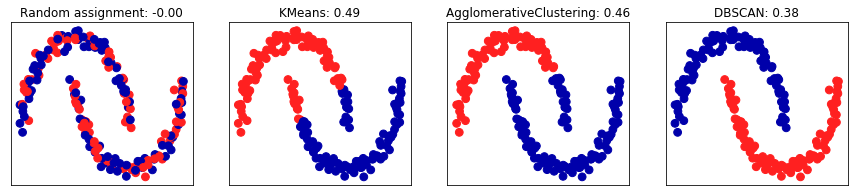

In [5]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks':(), 'yticks':()})

#random cluster
random_state = np.random.RandomState(seed=0)
random_cluster = random_state.randint(0, 2, len(X))

axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_cluster, cmap=mglearn.cm2, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(silhouette_score(X_scaled, random_cluster)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    cluster = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=cluster, cmap=mglearn.cm2, s=60)
    ax.set_title("{}: {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, cluster)))

In [5]:
# extract eigenfaces
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit(X_people)
X_pca = pca.transform(X_people)

In [23]:
# DBSCAN
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [25]:
# change min samples
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [26]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels:{}".format(np.unique(labels)))

Unique labels:[-1  0]


In [27]:
print("Number of points per cluster: {}".format(np.bincount(labels + 1)))

Number of points per cluster: [  31 2032]


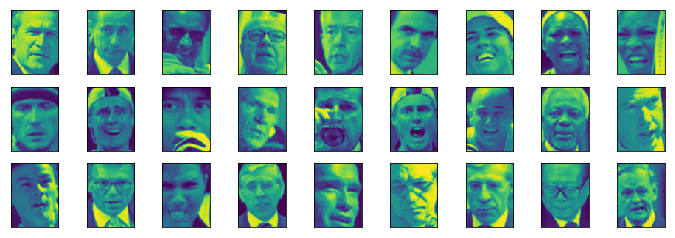

In [30]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks':(), 'yticks':()}, figsize=(12,4))

for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [31]:
# different values for eps
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Clusters present: {}".format(np.unique(labels)))
    print("Clusters size: {}".format(np.bincount(labels + 1)))


eps=1
Clusters present: [-1]
Clusters size: [2063]

eps=3
Clusters present: [-1]
Clusters size: [2063]

eps=5
Clusters present: [-1]
Clusters size: [2063]

eps=7
Clusters present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
Clusters size: [2003    4   14    7    4    3    3    4    4    3    3    5    3    3]

eps=9
Clusters present: [-1  0  1  2]
Clusters size: [1306  751    3    3]

eps=11
Clusters present: [-1  0]
Clusters size: [ 413 1650]

eps=13
Clusters present: [-1  0]
Clusters size: [ 120 1943]


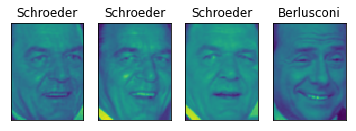

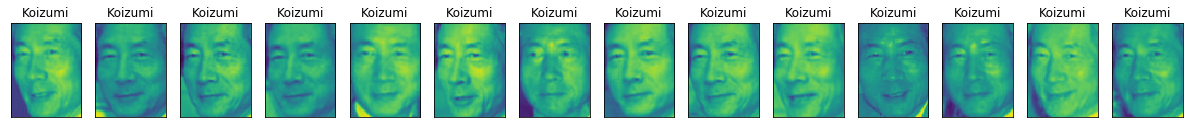

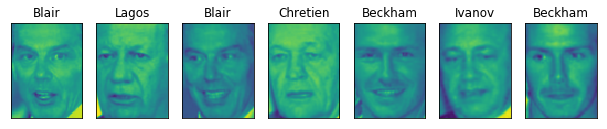

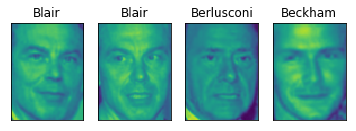

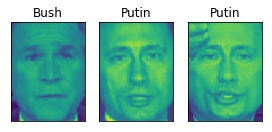

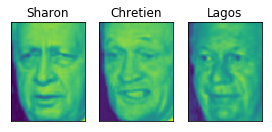

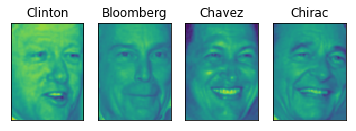

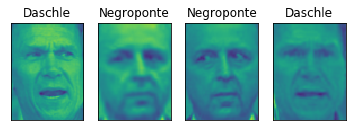

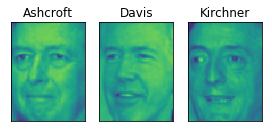

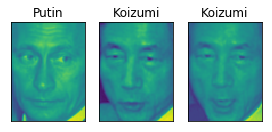

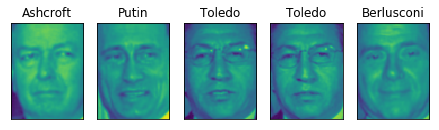

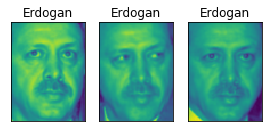

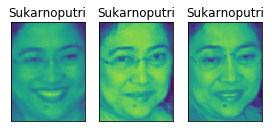

In [19]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images *1.5, 4), subplot_kw={'xticks':(), 'yticks':()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

In [20]:
# extract clusters with k-means
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

Cluster sizes k-means: [113 256 188 147 216 180 258 211 139 355]


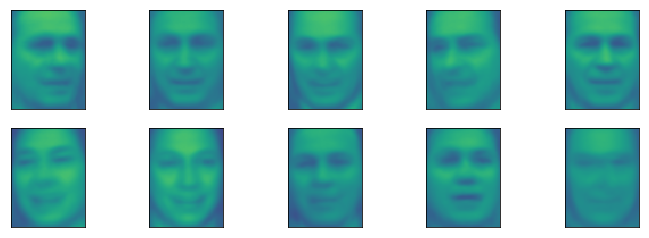

In [26]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks':(), 'yticks':()}, figsize=(12, 4))

for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)

In [6]:
# extract with agglomerative
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("Cluster sizes for agglomerative clustering: {}".format(np.bincount(labels_agg)))

Cluster sizes for agglomerative clustering: [478 254 317 119  96 191 424  17  55 112]


In [32]:
from sklearn.metrics.cluster import adjusted_rand_score

print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.07


Text(0,0.5,'cluster distance')

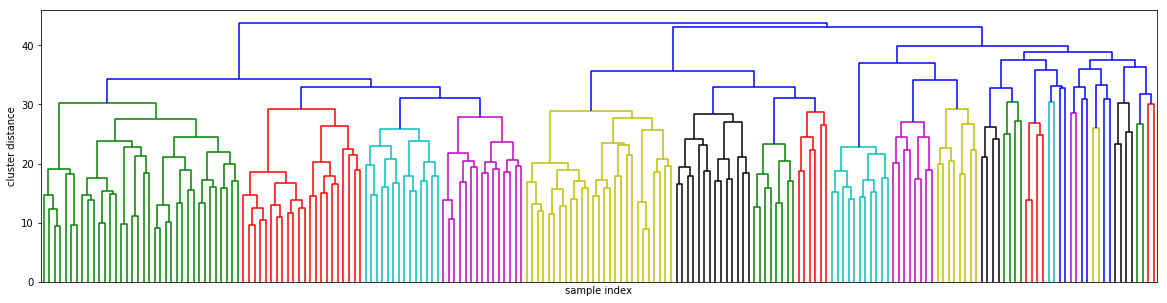

In [39]:
from scipy.cluster.hierarchy import dendrogram, ward

likage_array = ward(X_pca)
plt.figure(figsize=(20, 5))
dendrogram(likage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("sample index")
plt.ylabel("cluster distance")

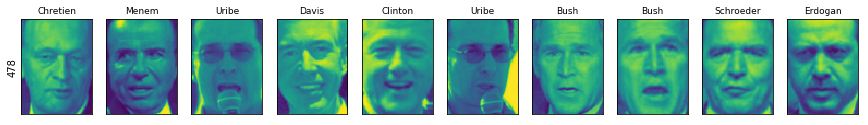

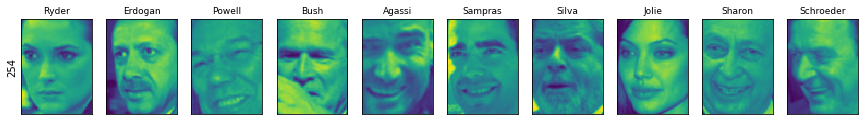

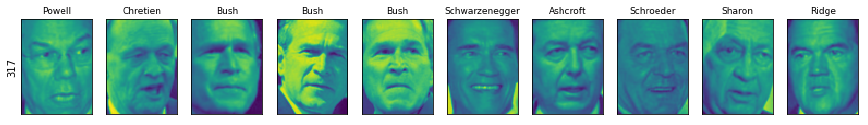

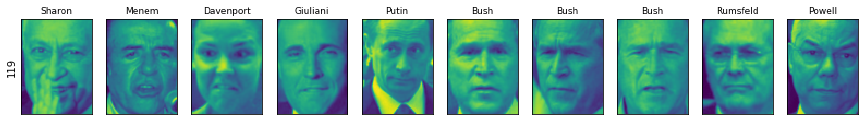

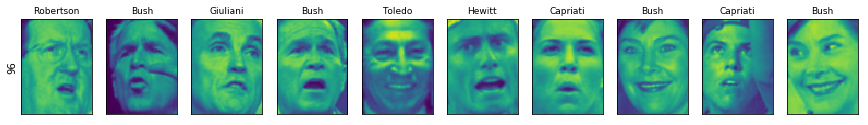

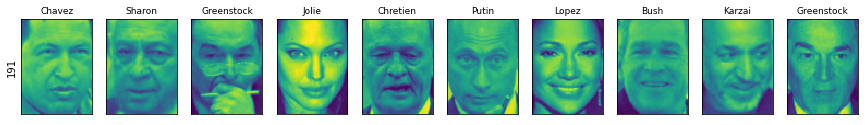

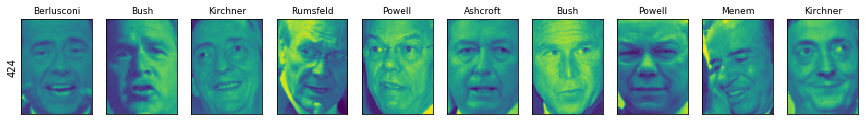

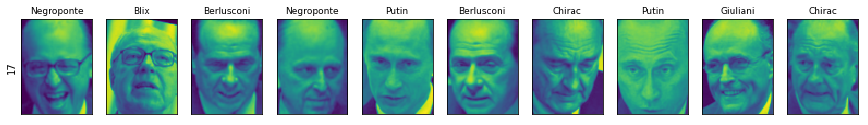

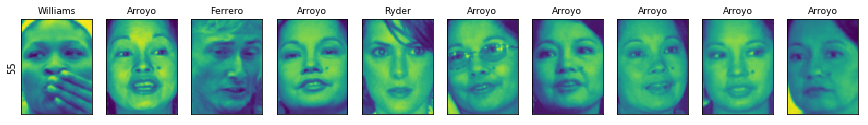

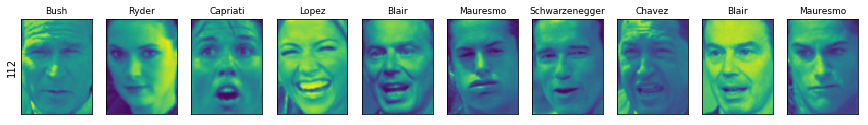

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks':(),'yticks':()}, figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize':9})

cluster size agglomerative clustering: [ 72 116  52 101 189 121  44   2 155  24  34  30  29  22   6  71  54 131
  41  53  20  96  30  36  12  61  54   8 182  19   7  17  50   5  22  22
  35  11  27   2]


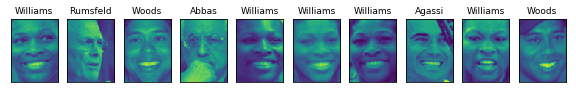

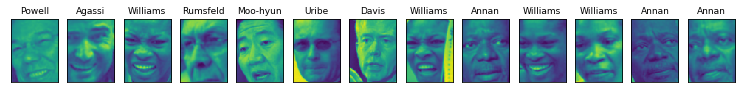

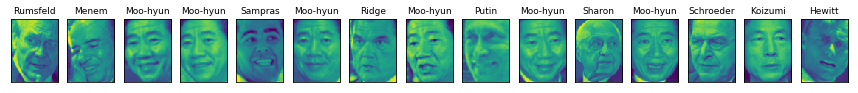

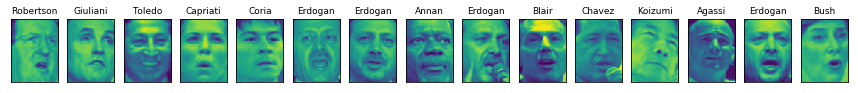

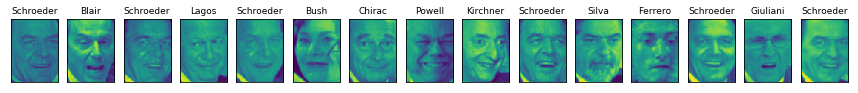

In [12]:
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster size agglomerative clustering: {}".format(np.bincount(labels_agg)))

n_clusters = 40
for cluster in [10, 13, 19, 22, 36]:
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks':(), 'yticks':()}, figsize=(15, 8))
    cluster_size = np.sum(mask)
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})
    for i in range(cluster, 15):
        axes[i].set_visible(False)